In [2]:
%matplotlib inline
import pandas as pd

df_log = pd.read_table('data/product_log.tsv')
df_log.head()

,Date,Num,Product
0,2017-01-03,1.0,B
1,2017-01-06,2.0,B
2,2017-01-07,1.0,A
3,2017-01-11,2.0,A
4,2017-01-12,2.0,B


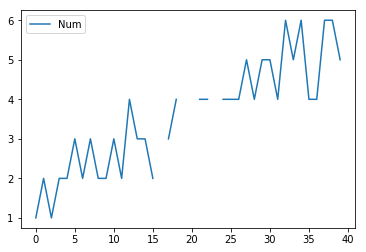

In [4]:
df_log.plot();

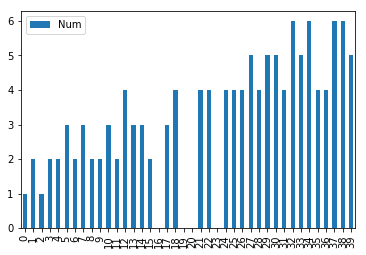

In [5]:
df_log.plot.bar();

In [13]:
### 欠損値をカウント

In [6]:
# 欠損値かどうか
df_log_isnull = df_log.isnull()
df_log_isnull[15:21]

,Date,Num,Product
15,False,False,False
16,False,True,False
17,False,False,False
18,False,False,False
19,False,True,False
20,False,True,False


In [7]:
# 列ごとに欠損値かどうか
df_log_isnull_column = df_log.isnull().any(0)
df_log_isnull_column

Date       False
Num         True
Product    False
dtype: bool

In [8]:
# 行ごとに欠損値かどうか
df_log_isnull_row = df_log.isnull().any(1)
df_log_isnull_row[15:21]

15    False
16     True
17    False
18    False
19     True
20     True
dtype: bool

In [9]:
# 欠損値が含まれる行のみ抽出
df_log[df_log.isnull().any(1)]

,Date,Num,Product
16,2017-02-08,NaN,A
19,2017-02-16,NaN,A
20,2017-02-18,NaN,A
23,2017-02-24,NaN,A


In [10]:
# 欠損値をカウント
df_null_count = df_log.isnull().sum()
df_null_count

Date       0
Num        4
Product    0
dtype: int64

In [11]:
# 欠損値ではない個数をカウント
df_log_count = df_log.count()
df_log_count

Date       40
Num        36
Product    40
dtype: int64

In [12]:
# 欠損値をカウント2
len(df_log) - df_log.count()

Date       0
Num        4
Product    0
dtype: int64

In [ ]:
### 欠損値の扱い

In [14]:
# 単純に合計を計算すると、、、
sum(df_log.Num)

nan

In [15]:
# 欠損値を含んだデータから欠損値を除いて合計を求める
df_log.Num.sum()

129.0

In [16]:
# 欠損値を含んでいるデータの場合の平均（欠損値は平均の計算で無視されます）
df_log_mean = df_log.Num.mean()
df_log_mean

3.5833333333333335

In [17]:
# 平均の計算の分母の数は、全データ数ではありません
print('全データ数', len(df_log.Num))
df_log.Num.sum() / len(df_log.Num)

全データ数 40


3.225

In [18]:
# 平均の計算の分母の数は、欠損値を除くデータ数になります
print('欠損値を除くデータ数', df_log.Num.count())
df_log_mean2 = df_log.Num.sum() / df_log.Num.count()
df_log_mean2

欠損値を除くデータ数 36


3.5833333333333335